In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Loading the CSV_1 metadata dataset

In [37]:
dataset_df = pd.read_csv('../Source/HAM10000_metadata_part1.csv')
dataset_df.head(10)

lesion_id      image_id   dx    dx_type   age     sex     localization  \
0  HAM_0007180  ISIC_0033272  mel      histo  65.0    male             face   
1  HAM_0007195  ISIC_0031923   nv      histo  40.0  female  lower extremity   
2  HAM_0001835  ISIC_0026652  mel      histo  65.0    male             back   
3  HAM_0000465  ISIC_0030583  bkl  consensus  35.0  female            trunk   
4  HAM_0001720  ISIC_0034010   nv      histo  45.0    male          abdomen   
5  HAM_0006333  ISIC_0024424   nv      histo  35.0    male            trunk   
6  HAM_0004548  ISIC_0032832   nv      histo  45.0  female  upper extremity   
7  HAM_0006526  ISIC_0026671   nv      histo  55.0    male  lower extremity   
8  HAM_0003102  ISIC_0032389  mel      histo  65.0    male             face   
9  HAM_0004260  ISIC_0025525   nv      histo  65.0    male             back   

                                          image_path  \
0  C://Users//Amreet//Desktop//Skin-Cancer-Classi...   
1  C://Users//Amreet//Desktop//Skin-Cancer-Classi...   
2  C://Users//Amreet//Desktop//Skin-Cancer-Classi...   
3  C://Users//Amreet//Desktop//Skin-Cancer-Classi...   
4  C://Users//Amreet//Desktop//Skin-Cancer-Classi...   
5  C://Users//Amreet//Desktop//Skin-Cancer-Classi...   
6  C://Users//Amreet//Desktop//Skin-Cancer-Classi...   
7  C://Users//Amreet//Desktop//Skin-Cancer-Classi...   
8  C://Users//Amreet//Desktop//Skin-Cancer-Classi...   
9  C://Users//Amreet//Desktop//Skin-Cancer-Classi...   

                        cell_type  cell_type_idx  
0                        Melanoma              5  
1                Melanocytic nevi              4  
2                        Melanoma              5  
3  Benign keratosis-like lesions               2  
4                Melanocytic nevi              4  
5                Melanocytic nevi              4  
6                Melanocytic nevi              4  
7                Melanocytic nevi              4  
8                        Melanoma              5  
9                Melanocytic nevi              4

### Finding the missing values present inside the dataset with Non_Null Count (If less value then missing values)

In [38]:
print("Details regarding the Dataset")
dataset_df.info()
print("Shape of the Dataset -- ",dataset_df.shape)

Details regarding the Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5007 entries, 0 to 5006
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   lesion_id      5007 non-null   object 
 1   image_id       5007 non-null   object 
 2   dx             5007 non-null   object 
 3   dx_type        5007 non-null   object 
 4   age            4976 non-null   float64
 5   sex            5007 non-null   object 
 6   localization   5007 non-null   object 
 7   image_path     5007 non-null   object 
 8   cell_type      5007 non-null   object 
 9   cell_type_idx  5007 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 391.3+ KB
Shape of the Dataset --  (5007, 10)


### Bar plot to check the count (Imbalanced Dataset)

C:\Users\Amreet\AppData\Local\Temp\ipykernel_23744\2588004640.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = dataset_df['cell_type'], #cell_type


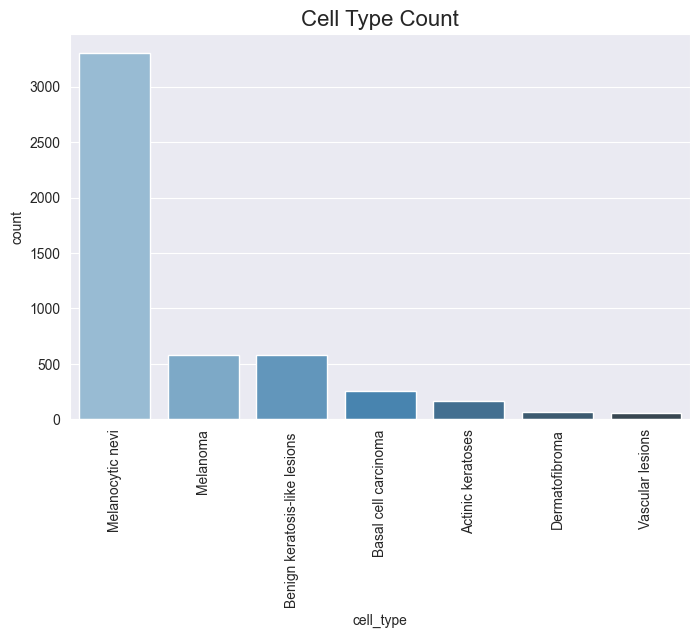

cell_type
Melanocytic nevi                  3308
Melanoma                           578
Benign keratosis-like lesions      578
Basal cell carcinoma               252
Actinic keratoses                  165
Dermatofibroma                      67
Vascular lesions                    59
Name: count, dtype: int64


In [39]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 5))
sns.countplot(x = dataset_df['cell_type'], #cell_type
                     order = dataset_df['cell_type'].value_counts().index, #cell_type
                     palette= "Blues_d")
plt.xticks(rotation = 90) 
plt.title('Cell Type Count',fontsize=16) 
plt.show()
print(dataset_df['cell_type'].value_counts())

### Checking for before and after re-sizing the image

RGB JPEG


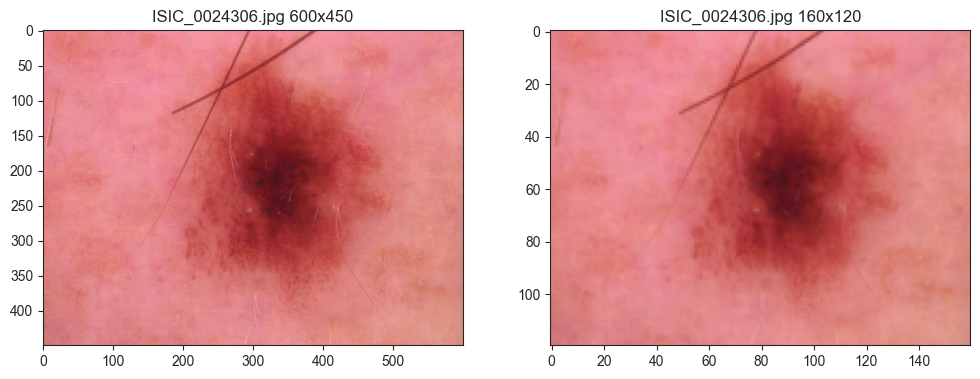

In [40]:
sns.set_style("ticks")
from PIL import Image
plt.figure(figsize=(12, 9))

plt.subplot(2,2,1)
imSize1 = Image.open('..//Source//HAM10000_images_part_1//ISIC_0024306.jpg')
plt.title('ISIC_0024306.jpg 600x450')
plt.imshow(imSize1)

plt.subplot(2,2,2)
img_ISIC_0024306_160x120 = imSize1.resize((160,120), Image.LANCZOS)
plt.title('ISIC_0024306.jpg 160x120')
plt.imshow(img_ISIC_0024306_160x120)

print(imSize1.mode, imSize1.format)
plt.show()

RGB JPEG


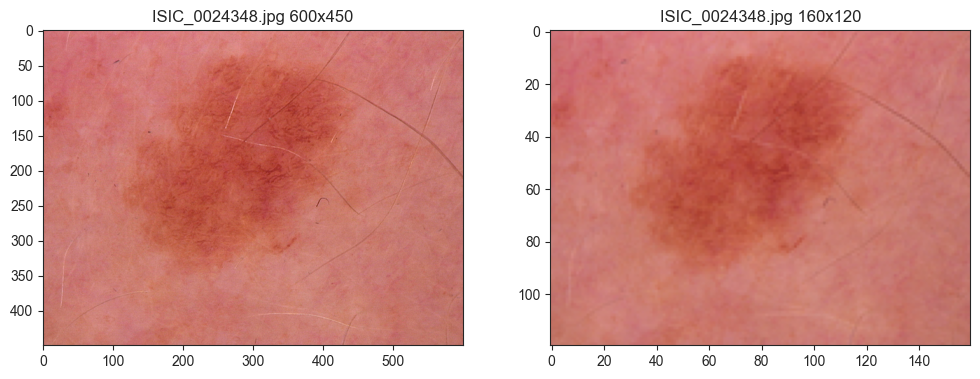

In [41]:
sns.set_style("ticks")
from PIL import Image
plt.figure(figsize=(12, 9))

plt.subplot(2,2,1)
imSize1 = Image.open('..//Source//HAM10000_images_part_1//ISIC_0024348.jpg')
plt.title('ISIC_0024348.jpg 600x450')
plt.imshow(imSize1)

plt.subplot(2,2,2)
img_ISIC_0024348_160x120 = imSize1.resize((160,120), Image.LANCZOS)
plt.title('ISIC_0024348.jpg 160x120')
plt.imshow(img_ISIC_0024348_160x120)

print(imSize1.mode, imSize1.format)
plt.show()

### Checking for Null Values Present inside the Dataset that is created

In [42]:
dataset_df.isna().sum()

lesion_id         0
image_id          0
dx                0
dx_type           0
age              31
sex               0
localization      0
image_path        0
cell_type         0
cell_type_idx     0
dtype: int64

### Seems that the age columns have null values So now we can fill it by calculating the mean values and putting in those null places

In [43]:
dataset_df['age'].fillna((dataset_df['age'].mean()), inplace=True)   # Replacing all the missing values with the mean values

# checking again for the missing values present or not
dataset_df.isna().sum()

C:\Users\Amreet\AppData\Local\Temp\ipykernel_23744\3586093646.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_df['age'].fillna((dataset_df['age'].mean()), inplace=True)   # Replacing all the missing values with the mean values


lesion_id        0
image_id         0
dx               0
dx_type          0
age              0
sex              0
localization     0
image_path       0
cell_type        0
cell_type_idx    0
dtype: int64

### Genderwise Data Differentiability

C:\Users\Amreet\AppData\Local\Temp\ipykernel_23744\1432927317.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='sex',data=dataset_df, palette = 'Paired')


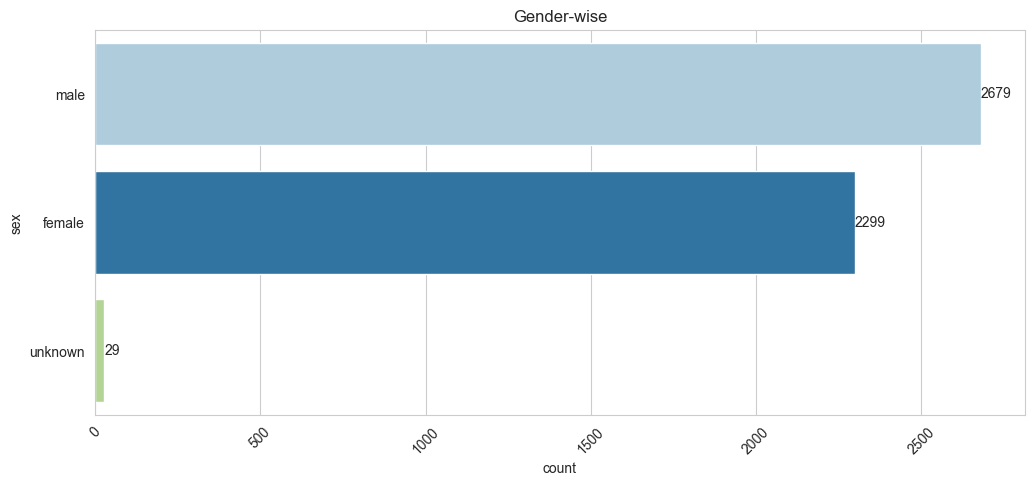

In [44]:
sns.set_style('whitegrid')
colors = ['#00FFFF','#FF3399', '#FFFF00']
fig,axes = plt.subplots(figsize=(12,5))

ax = sns.countplot(y='sex',data=dataset_df, palette = 'Paired')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Gender-wise')
plt.xticks(rotation=45)
plt.show()

From the above it is observed that males experience more skin cancer disease rather than females, but on the other hand the difference between those is not high.
It is as if both are equally suffering from the skin related disease

### Cell type affects in patients

C:\Users\Amreet\AppData\Local\Temp\ipykernel_23744\2628757840.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='cell_type',data=dataset_df, order = dataset_df['cell_type'].value_counts().index, palette = 'Paired')


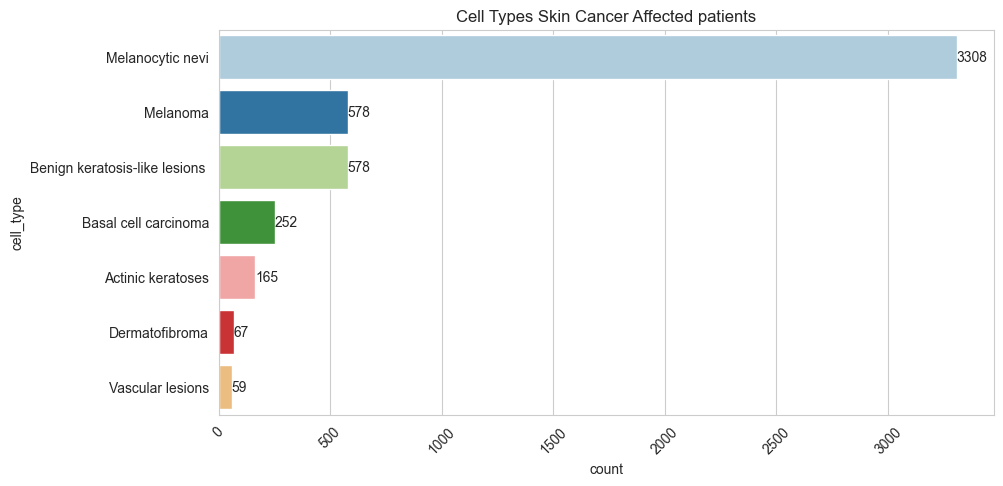

In [45]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(10,5))
ax = sns.countplot(y='cell_type',data=dataset_df, order = dataset_df['cell_type'].value_counts().index, palette = 'Paired')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Cell Types Skin Cancer Affected patients')
plt.xticks(rotation=45)
plt.show()

Melanocytic nevi skin diseases are extremely common compared to other types of skin diseases among the people. Next to melanocytic nevi, we have Melanoma and Benign Keratosis-like lesions and the other cell types of skin disease thereafter are less affected.

In [46]:
dataset2_df = pd.read_csv('../Source/HAM10000_metadata_part2.csv')
dataset2_df.head(10)

lesion_id      image_id   dx    dx_type   age     sex     localization  \
0  HAM_0006122  ISIC_0031556  bkl      histo  60.0    male            scalp   
1  HAM_0003272  ISIC_0027979   nv  follow_up  30.0    male  upper extremity   
2  HAM_0001408  ISIC_0031004   nv  follow_up  80.0    male             back   
3  HAM_0001842  ISIC_0028359   nv  follow_up  45.0  female  upper extremity   
4  HAM_0007189  ISIC_0027878   nv      histo  40.0  female            trunk   
5  HAM_0001100  ISIC_0032209   nv      histo  55.0    male            chest   
6  HAM_0002035  ISIC_0024989   nv  follow_up  45.0  female  upper extremity   
7  HAM_0005630  ISIC_0025864   nv  follow_up  45.0  female  lower extremity   
8  HAM_0006949  ISIC_0031886   nv  follow_up  35.0    male          abdomen   
9  HAM_0005064  ISIC_0028198  mel      histo  40.0  female             back   

                                          image_path  \
0  C://Users//Amreet//Desktop//Skin-Cancer-Classi...   
1  C://Users//Amreet//Desktop//Skin-Cancer-Classi...   
2  C://Users//Amreet//Desktop//Skin-Cancer-Classi...   
3  C://Users//Amreet//Desktop//Skin-Cancer-Classi...   
4  C://Users//Amreet//Desktop//Skin-Cancer-Classi...   
5  C://Users//Amreet//Desktop//Skin-Cancer-Classi...   
6  C://Users//Amreet//Desktop//Skin-Cancer-Classi...   
7  C://Users//Amreet//Desktop//Skin-Cancer-Classi...   
8  C://Users//Amreet//Desktop//Skin-Cancer-Classi...   
9  C://Users//Amreet//Desktop//Skin-Cancer-Classi...   

                        cell_type  cell_type_idx  
0  Benign keratosis-like lesions               2  
1                Melanocytic nevi              4  
2                Melanocytic nevi              4  
3                Melanocytic nevi              4  
4                Melanocytic nevi              4  
5                Melanocytic nevi              4  
6                Melanocytic nevi              4  
7                Melanocytic nevi              4  
8                Melanocytic nevi              4  
9                        Melanoma              5

C:\Users\Amreet\AppData\Local\Temp\ipykernel_23744\1803505465.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='cell_type',data=dataset2_df, order = dataset2_df['cell_type'].value_counts().index, palette = 'Paired')


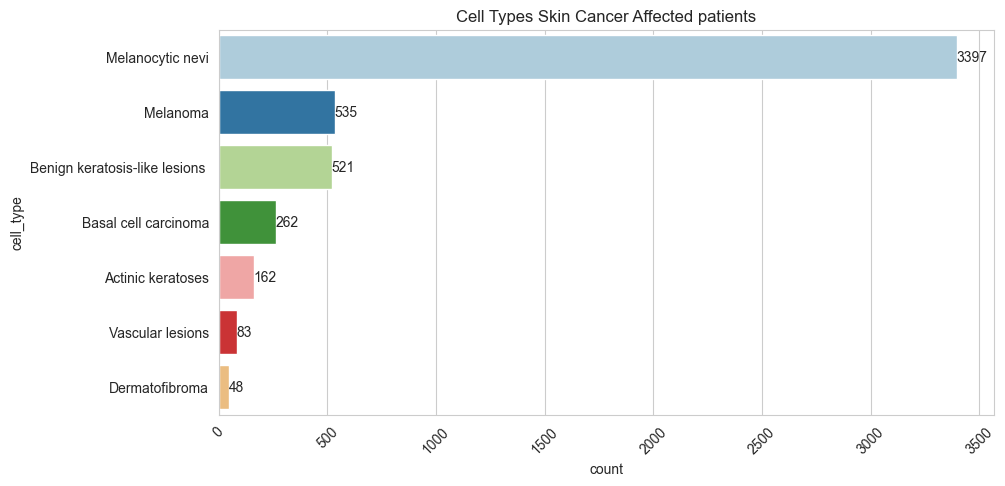

In [47]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(10,5))
ax = sns.countplot(y='cell_type',data=dataset2_df, order = dataset2_df['cell_type'].value_counts().index, palette = 'Paired')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Cell Types Skin Cancer Affected patients')
plt.xticks(rotation=45)
plt.show()

### Gender Type vs Cell Type

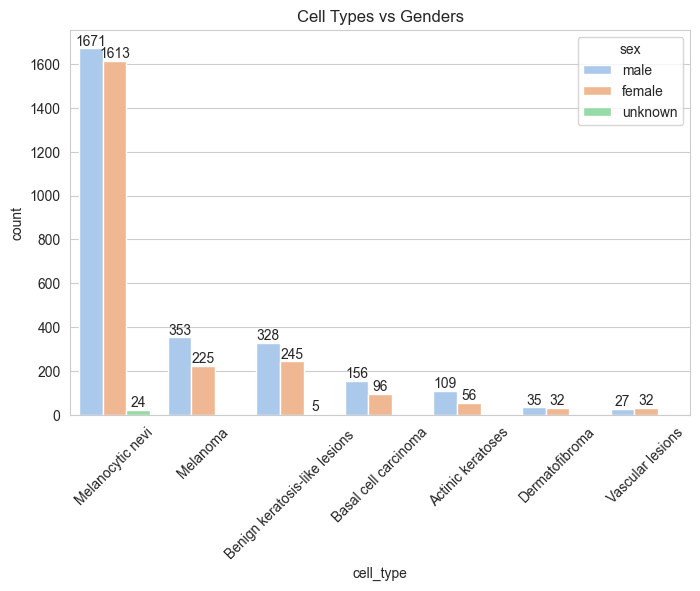

In [48]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(8,5))
ax = sns.countplot(x='cell_type',hue='sex', data=dataset_df, order = dataset_df['cell_type'].value_counts().index, palette = 'pastel')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Cell Types vs Genders')
plt.xticks(rotation=45)
plt.show()

It is observed that Most Skin cancer Victims are Males regardless of any type of the skin disease that we encounter

### Cell Type Confirmation Technique Distribution

C:\Users\Amreet\AppData\Local\Temp\ipykernel_23744\3049595173.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='dx_type',data=dataset_df, order = dataset_df['dx_type'].value_counts().index, palette = 'flare')


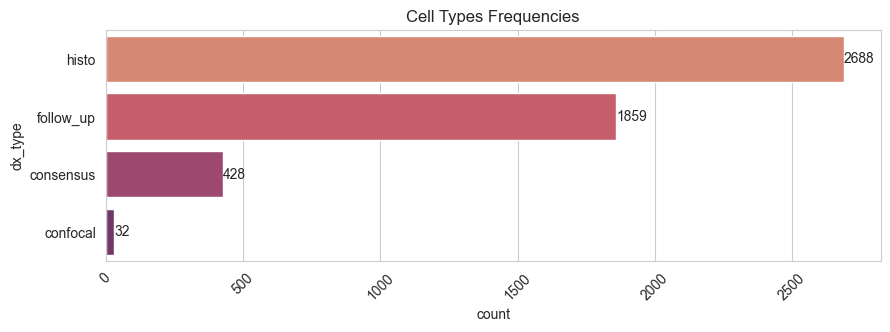

In [49]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(10,3))
ax = sns.countplot(y='dx_type',data=dataset_df, order = dataset_df['dx_type'].value_counts().index, palette = 'flare')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Cell Types Frequencies')
plt.xticks(rotation=45)
plt.show()

It is observed that more than half of lesions are confirmed through histopathology (histo), and for the remaining cases it involves either follow-up examination (follow_up), expert consensus (consensus), and confocal microscopy (confocal).

### Gender vs Cell Type Confirmation Technique Distribution

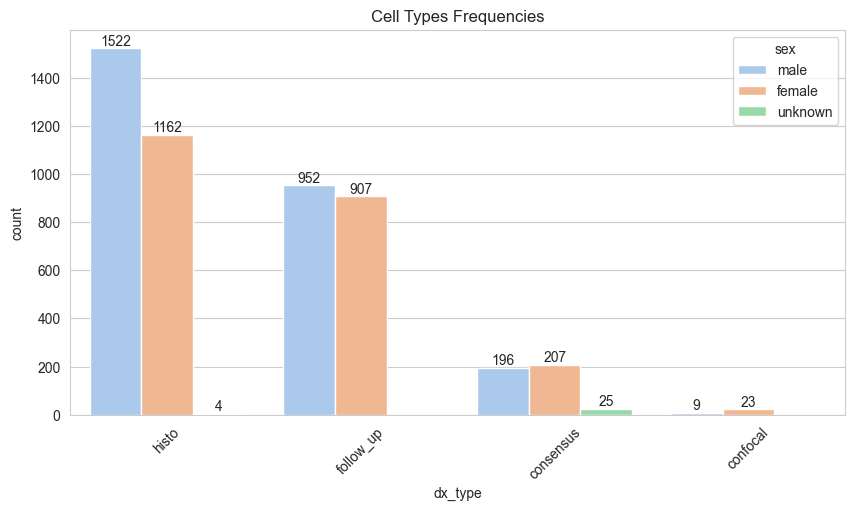

In [50]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(10,5))
ax = sns.countplot(x='dx_type',hue='sex', data=dataset_df, order = dataset_df['dx_type'].value_counts().index, palette = 'pastel')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Cell Types Frequencies')
plt.xticks(rotation=45)
plt.show()

### Body parts affected by Skin disease

C:\Users\Amreet\AppData\Local\Temp\ipykernel_23744\1788768016.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='localization',data=dataset_df, order = dataset_df['localization'].value_counts().index, palette = 'blend:#7AB,#EDA')


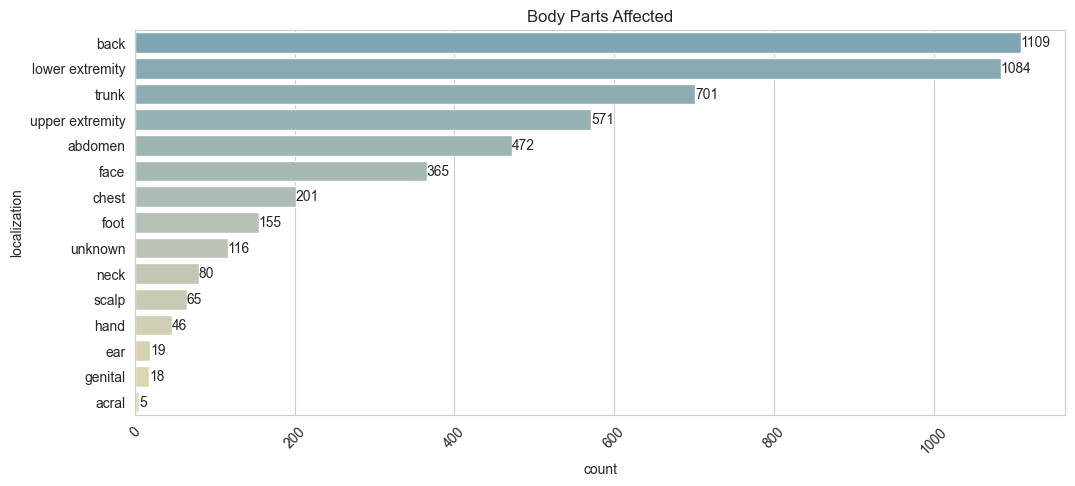

In [51]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,5))
ax = sns.countplot(y='localization',data=dataset_df, order = dataset_df['localization'].value_counts().index, palette = 'blend:#7AB,#EDA')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Body Parts Affected')
plt.xticks(rotation=45)
plt.show()

From the above it is observed that the back is mostly affected in the skin disease followed by lower extremity and trunk. The main reason that can be concluded is that these are those regions which becomes sweaty easily
In other words the area of the body which gets sweaty easily are more likely to be affected by the skin related diseases

### Gender Affected vs Body Parts affected

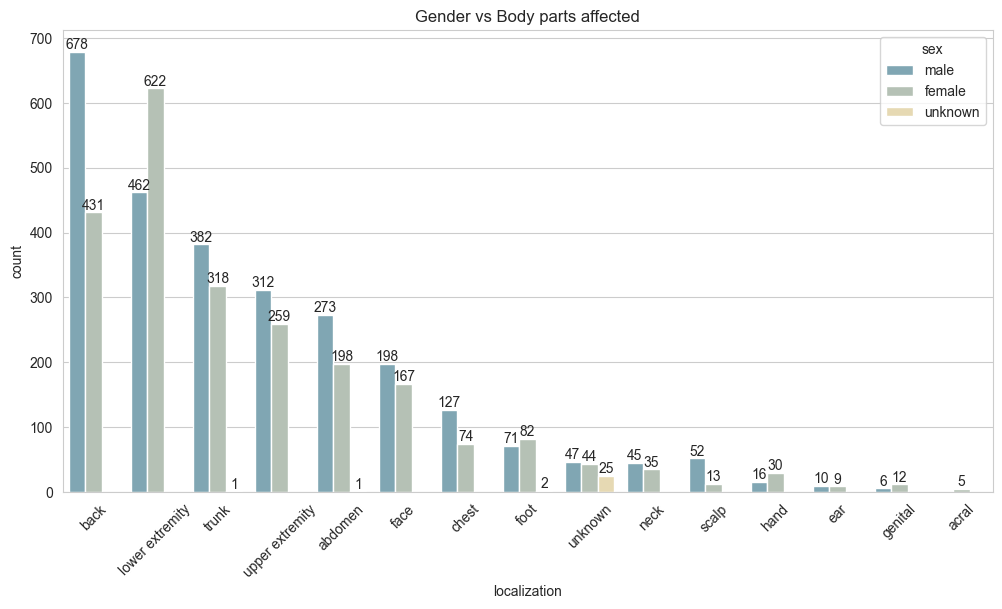

In [52]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,6))
ax = sns.countplot(x='localization',hue='sex', data=dataset_df, order = dataset_df['localization'].value_counts().index, palette = 'blend:#7AB,#EDA')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Gender vs Body parts affected')
plt.xticks(rotation=45)
plt.show()

### Age Group Affected By the Skin Related Disease

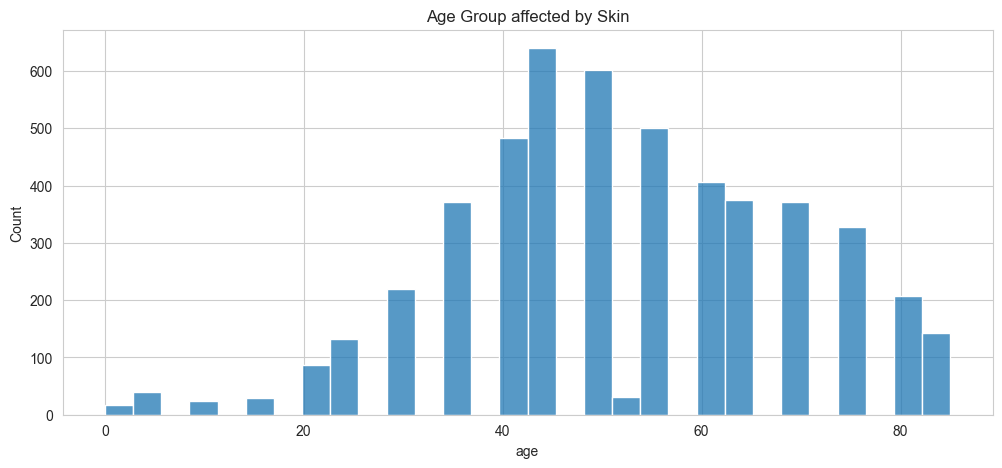

In [53]:
sns.set_style('whitegrid')
colors = ['#00FFFF']
fig,axes = plt.subplots(figsize=(12,5))
ax = sns.histplot(data=dataset_df, x='age')
plt.title('Age Group affected by Skin')
plt.show()

sns.set_style('whitegrid')
colors = ['#00FFFF']
fig,axes = plt.subplots(figsize=(12,5))
ax = sns.histplot(data=dataset_df, x='age')
plt.title('Age Group affected by Skin')
plt.show()

It is observed that most of the people affected appears to be in their 40s to 60s

### Age vs Gender

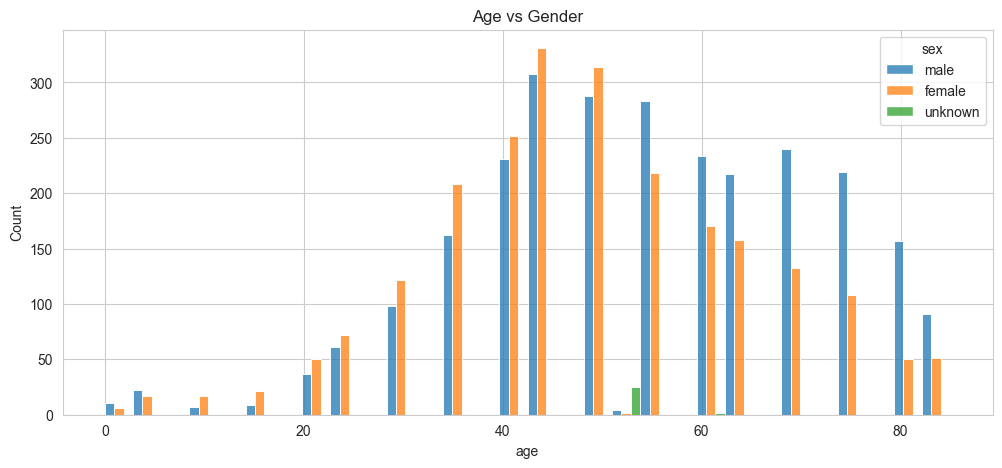

In [54]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,5))
#ax = sns.histplot(data=disease_df, x='age',hue='sex',multiple='stack',kde=True)
plt.title('Age vs Gender')
sns.histplot(data=dataset_df, x="age", hue="sex", multiple="dodge")
plt.show()

### Cell Type vs Age

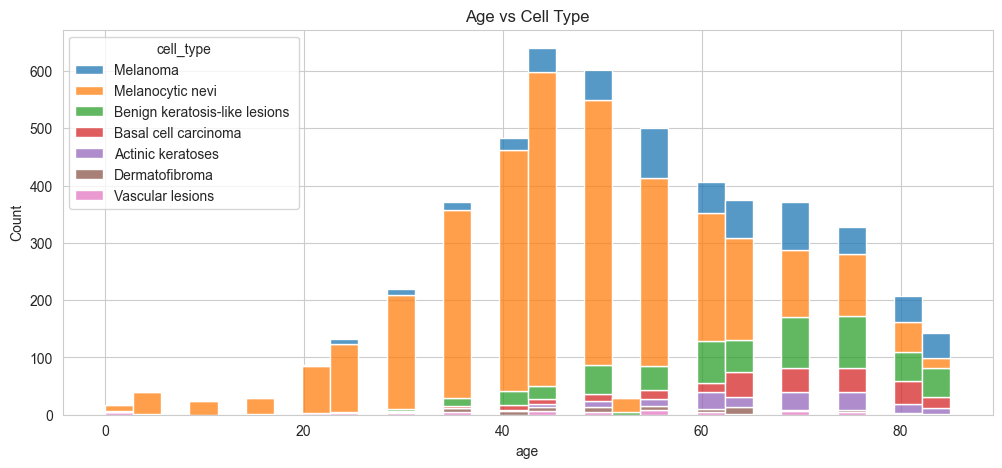

In [55]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,5))
ax = sns.histplot(data=dataset_df, x='age',hue='cell_type',multiple='stack')
plt.title('Age vs Cell Type')
plt.show()

### Body Part vs Age Group

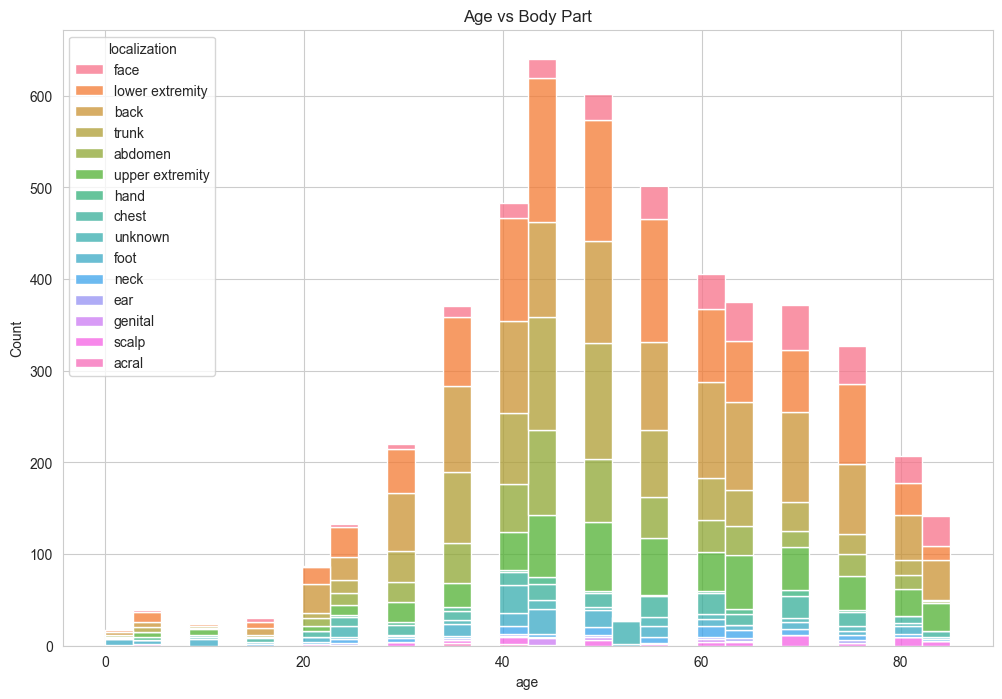

In [56]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.histplot(data=dataset_df, x='age',hue='localization',multiple='stack')
plt.title('Age vs Body Part')
plt.show()

### Pictorial Representation of the Dataset

In [57]:
from PIL import Image
dataset_df['image'] = dataset_df['image_path'].map(lambda x: np.asarray(Image.open(x).resize((160,120))))

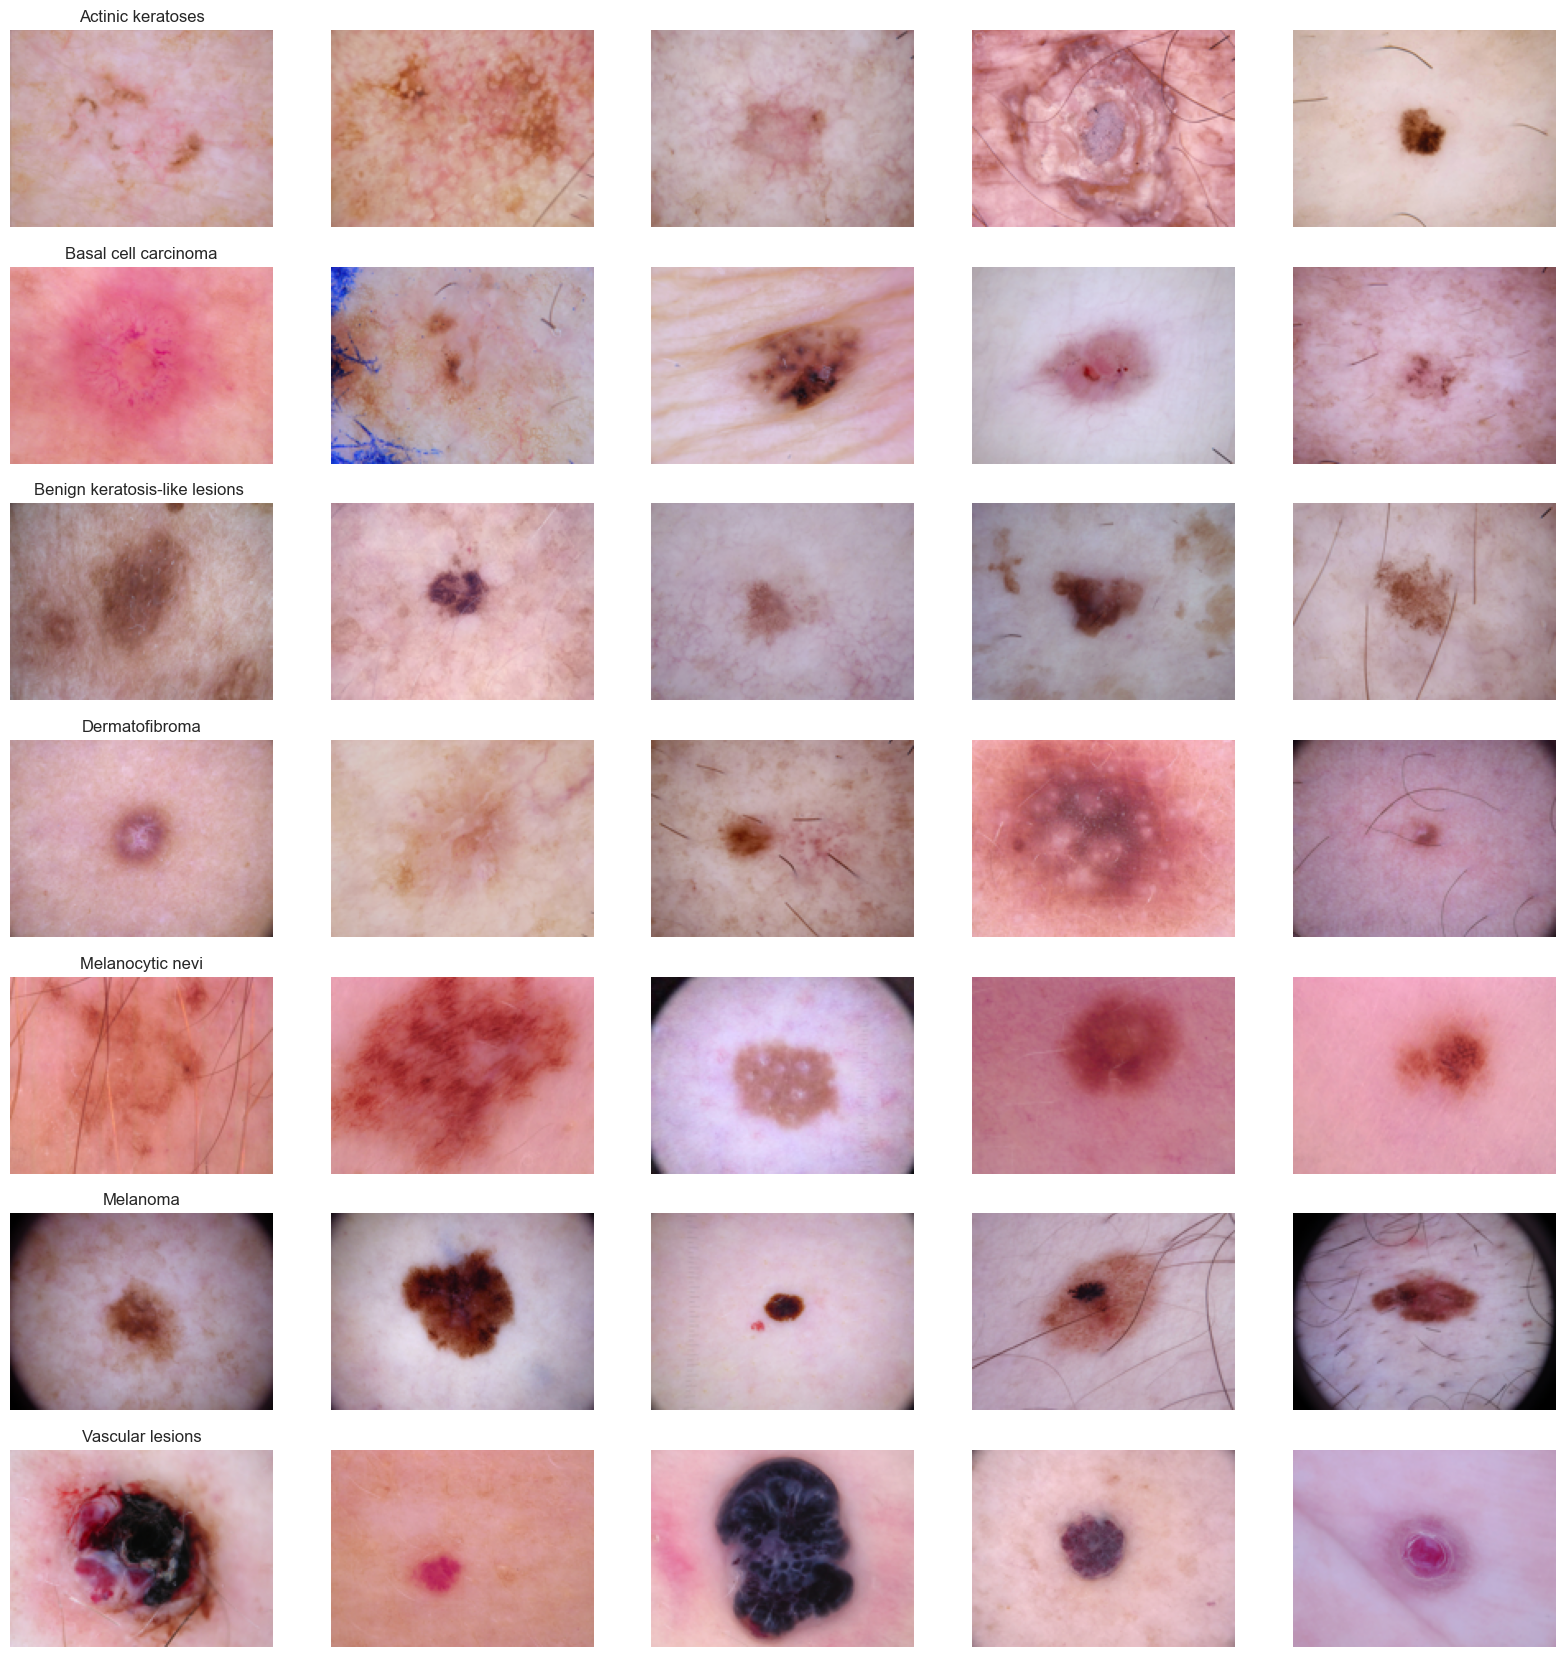

In [58]:
n_samples = 5
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, dataset_df.sort_values(['cell_type']).groupby('cell_type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')